# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
import pandas            as pd
import numpy             as np

import matplotlib.pyplot as plt

from welly                import Location
from welly                import Well

from mpl_toolkits.mplot3d import Axes3D


In [2]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots_Applications'

In [3]:
ls -l

total 8632
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395869 ago 29 22:43 c3.3-ehgeraldo_matplotlib_subplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplotlib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247083 ago 29 22:30 c6.6-ehgeraldo_matplotlib_subplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 1256299 ago 30 16:07 c7.7-ehgeraldo_well_locations.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 ago 30 10:42 data/


In [4]:
data = Well.from_las('/home/ehgeraldo/repos/Well_Logs_Plots/data/L05-15-Spliced.las')

In [5]:
survey = pd.read_csv('/home/ehgeraldo/repos/Well_Logs_Plots/data/L05-15-Survey.csv')

## Data dimensions

In [6]:
print('Number of rows: {}'.format(survey.shape[0]))
print('Number of cols: {}'.format(survey.shape[1]))

Number of rows: 112
Number of cols: 6


## Data types

In [7]:
survey.dtypes

MD          float64
INC         float64
AZI         float64
TVD         float64
X-offset    float64
Y-offset    float64
dtype: object

## Check NAs 

In [13]:
survey.isna().sum()

MD          0
INC         0
AZI         0
TVD         0
X-offset    0
Y-offset    0
dtype: int64

In [14]:
survey.sample().T

,29
MD,911.90
INC,5.48
AZI,204.50
TVD,910.58
X-offset,-20.12
Y-offset,-12.49


## Data Describe

In [15]:
survey.describe()

,MD,INC,AZI,TVD,X-offset,Y-offset
count,112.0000000000,112.0000000000,112.0000000000,112.0000000000,112.0000000000,112.0000000000
mean,1663.3873214286,13.7564285714,209.1367857143,1625.4036607143,-104.4538392857,-228.8469642857
std,923.2893433356,7.8002349072,39.8912796633,886.4953710290,89.8603303656,221.1470402645
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,-285.9400000000,-653.6600000000
25%,876.3500000000,5.7850000000,200.1900000000,875.1925000000,-182.2875000000,-428.3125000000
50%,1668.6000000000,17.3750000000,204.2100000000,1641.9250000000,-84.4300000000,-181.9000000000
75%,2460.9500000000,19.8325000000,208.1900000000,2387.5400000000,-18.8675000000,-9.3675000000
max,3213.0000000000,24.1200000000,323.4800000000,3096.9300000000,0.0000000000,8.8500000000


## Descriptive Statistical

In [17]:
num_attributes = survey.select_dtypes('float64')

In [18]:
num_attributes.sample(2)

,MD,INC,AZI,TVD,X-offset,Y-offset
91,2664.6,18.1,203.79,2579.87,-210.18,-489.13
0,0.0,0.0,0.00,0.00,0.00,0.00


## Numerical Attributes

In [19]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,MD,0.00,3213.00,3213.00,1663.3873214286,1668.600,919.1582740980,-0.0195784746,-1.1970180531
1,INC,0.00,24.12,24.12,13.7564285714,17.375,7.7653343522,-0.5621146926,-1.2315414442
2,AZI,0.00,323.48,323.48,209.1367857143,204.210,39.7127942953,-1.4939372605,14.3554083275
3,TVD,0.00,3096.93,3096.93,1625.4036607143,1641.925,882.5289288915,-0.0529769083,-1.1821188109
4,X-offset,-285.94,0.00,285.94,-104.4538392857,-84.430,89.4582687052,-0.5449246650,-1.0798458713
5,Y-offset,-653.66,8.85,662.51,-228.8469642857,-181.900,220.1575630853,-0.4477239203,-1.2639390440


## Data Plotting

In [21]:
survey.head()

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.0,0.00,0.00,0.00,0.00,0.00
1,89.3,0.00,0.00,89.30,0.00,0.00
2,142.1,2.31,323.48,142.09,-0.63,0.86
3,170.2,3.89,319.12,170.14,-1.59,2.03
4,197.9,5.86,315.60,197.74,-3.20,3.75


In [22]:
survey_subset = survey[['MD','INC','AZI']]

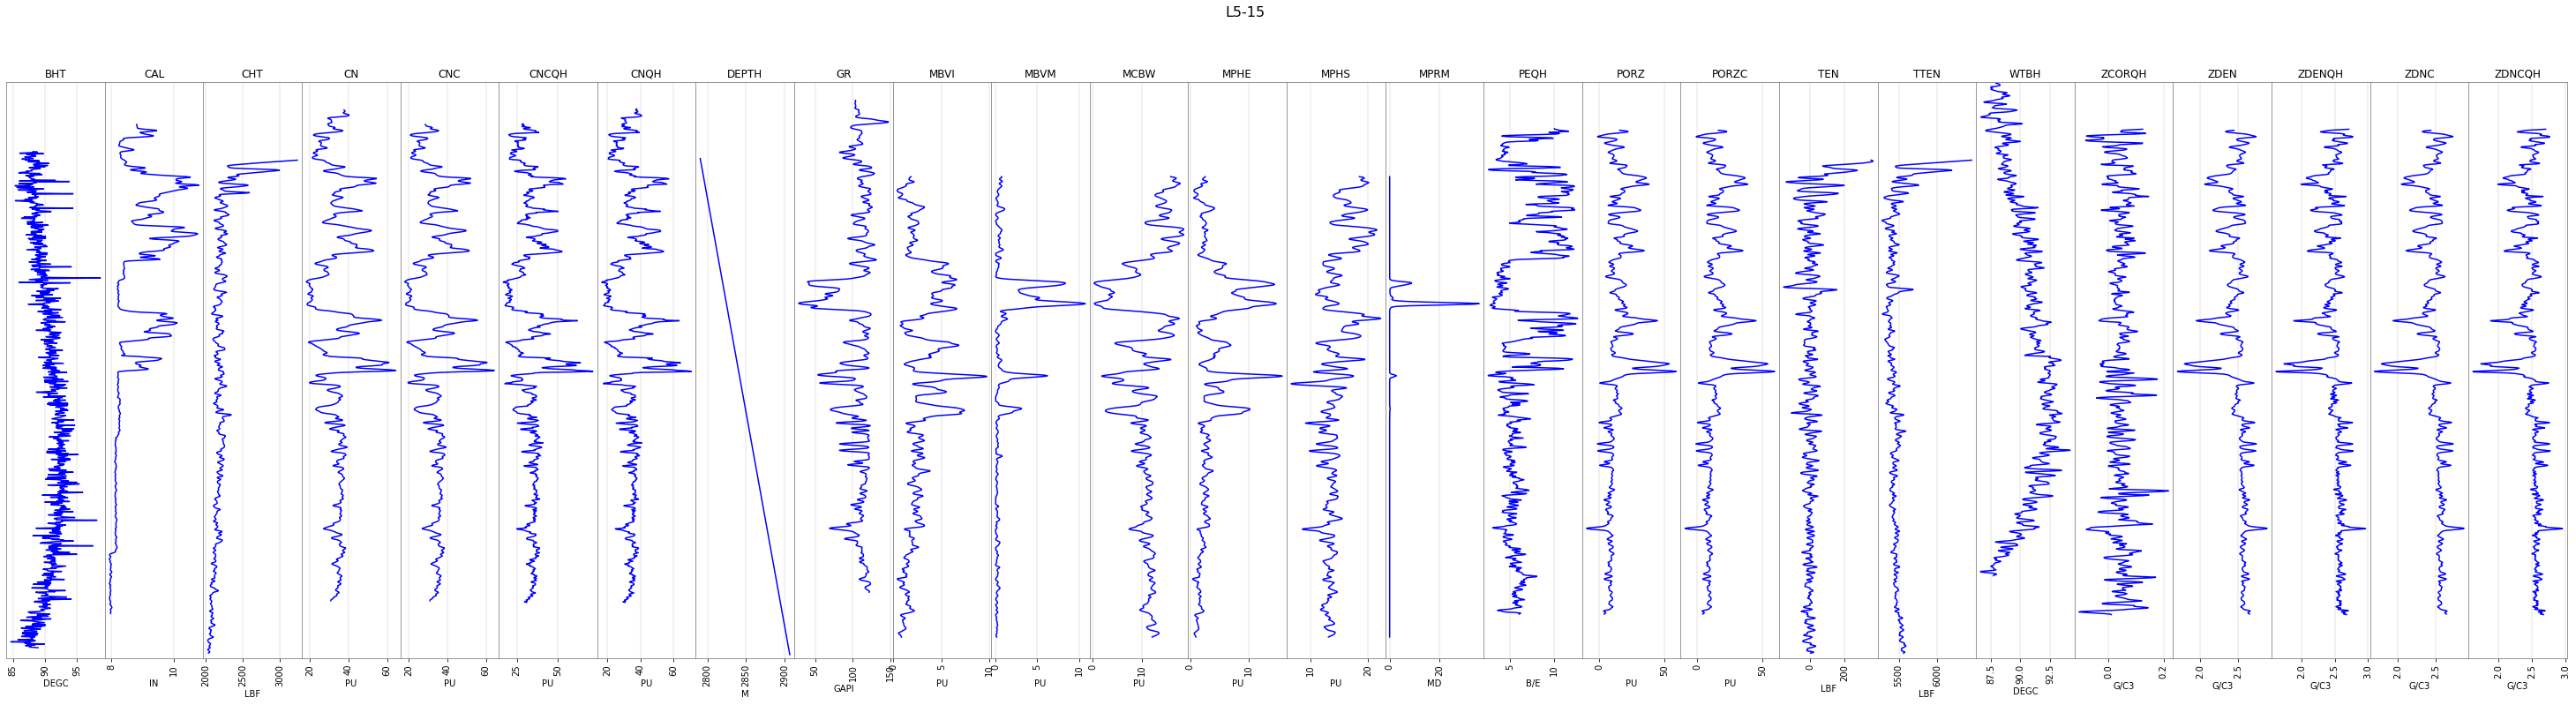

In [23]:
data.plot(extents='curves', color='blue')

# Adding INC and AZI to well

In [24]:
data.location.add_deviation(survey_subset.values)

In [25]:
data.location.position[0:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

# Location plot

In [26]:
x_loc = data.location.position[:,0]
y_loc = data.location.position[:,1]
z_loc = data.location.position[:,2]

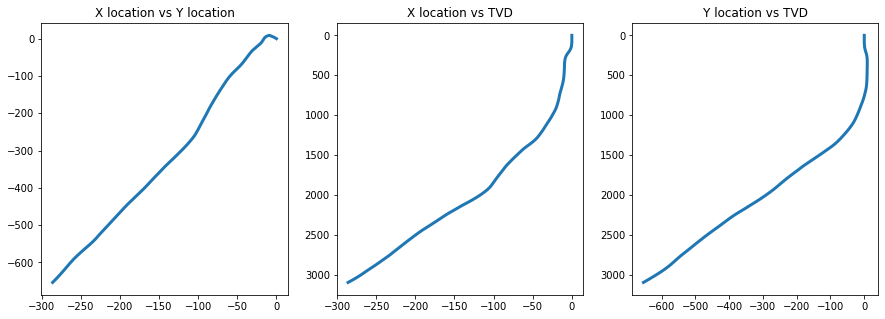

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.set_title('X location vs Y location')


ax2.plot(x_loc, z_loc, lw=3)
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()

ax3.plot(y_loc, z_loc, lw=3)
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()


# Add markers to start and end of the well

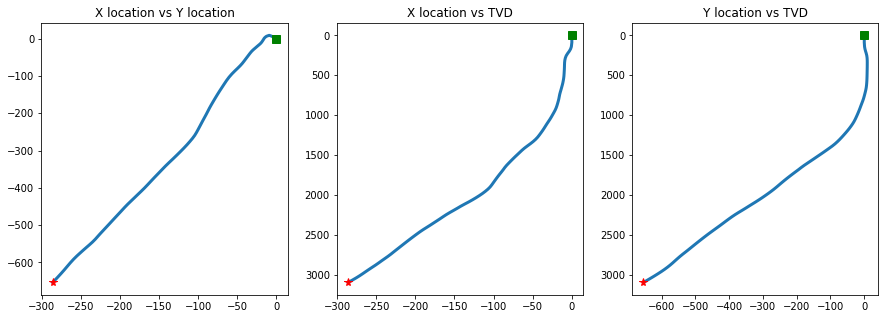

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))


ax1.plot(x_loc, y_loc, lw=3)
# markers
ax1.plot(x_loc[0],   y_loc[0], marker='s', color='green', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red',   ms=8)

# Title ax1
ax1.set_title('X location vs Y location')


ax2.plot(x_loc, z_loc, lw=3)
#markers
ax2.plot(x_loc[0],   z_loc[0], marker='s', color='green', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red',   ms=8)

# Title ax2
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()


ax3.plot(y_loc, z_loc, lw=3)
#markers
ax3.plot(y_loc[0],   z_loc[0], marker='s', color='green', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red',   ms=8)

# Title ax3
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()


# Compare plots on surveys takes

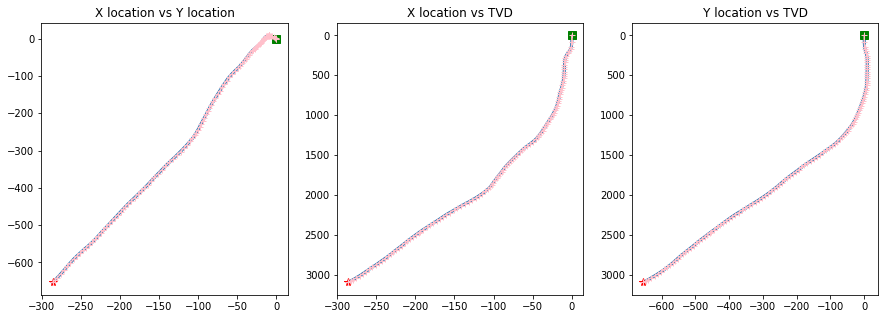

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))


ax1.plot(x_loc, y_loc, lw=3)
# markers
ax1.plot(x_loc[0],   y_loc[0], marker='s', color='green', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red',   ms=8)

# Title ax1
ax1.set_title('X location vs Y location')

# Survey
ax1.plot(survey['X-offset'], survey['Y-offset'], marker='+', color='pink')


ax2.plot(x_loc, z_loc, lw=3)
#markers
ax2.plot(x_loc[0],   z_loc[0], marker='s', color='green', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red',   ms=8)

# Title ax2
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()

# Survey
ax2.plot(survey['X-offset'], survey['TVD'], marker='+', color='pink')


ax3.plot(y_loc, z_loc, lw=3)
#markers
ax3.plot(y_loc[0],   z_loc[0], marker='s', color='green', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red',   ms=8)

# Title ax3
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()

# Survey
ax3.plot(survey['Y-offset'], survey['TVD'], marker='+', color='pink')

# 3D plot of well

##  Well L05-15


Identification: L05-15

Location: 53.8108467, 4.35141507 (WGS84)

Delivered location: 589075.56, 5963534.91(ED50-UTM31)

In [30]:
# Create a trajectory 

location_data = data.location.trajectory(datum=[589075.56, 5963534, 47.5], elev=False)

In [31]:
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

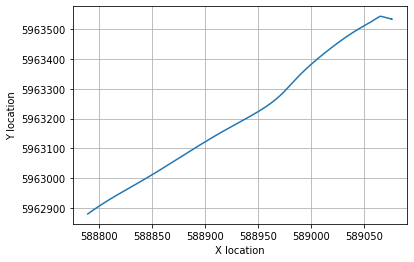

In [32]:
plt.plot(xs, ys)
plt.xlabel('X location')
plt.ylabel('Y location')
plt.ticklabel_format(style='plain')
plt.grid()

In [ ]:
%matplotlib widget

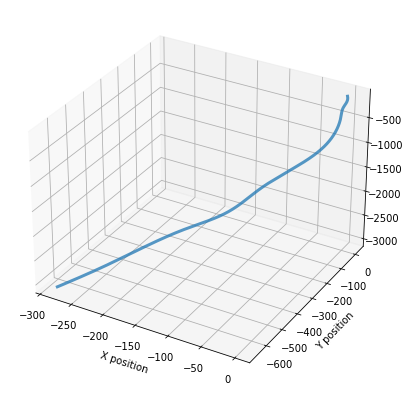

In [33]:
data.location.plot_3d()

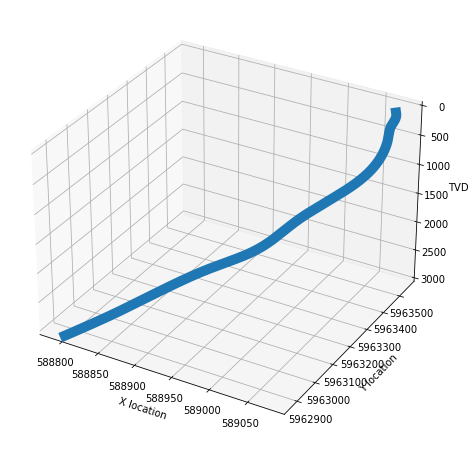

In [34]:
fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')
ax.plot3D(xs,ys,zs, lw=10)
ax.set_zlim(3000,0)

ax.set_xlabel('X location')
ax.set_ylabel('Y location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')
plt.show()